<a href="https://colab.research.google.com/github/JV-Machado/NBA_team_clustering/blob/master/NBA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1400]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1401]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Montando o Dataset

In [1402]:
soup_url = requests.get("https://www.basketball-reference.com/leagues/NBA_2023.html#all_per_game_team-opponent")
soup = BeautifulSoup(soup_url.content)

In [1403]:
#table = soup.find("table", attrs={"id" : "per_game_stats"})
table_team = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-team")
table_opponent = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-opponent")

In [1404]:
th = table_team.find("thead").find("tr").find_all("th")

In [1405]:
header = []
for t in th:
  header.append(t.getText())

In [1406]:
header = header[1:]
header

['Team',
 'G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [1407]:
data_team = table_team.find('tbody').find_all('tr')
data_opponent = table_opponent.find('tbody').find_all('tr')

In [1408]:
nba_teams = []
for team in data_team:
  stats = [td.getText() for td in team.find_all('td')]
  nba_teams.append(stats)

In [1409]:
nba_opponents = []
for opponent in data_opponent:
  stats = [td.getText() for td in opponent.find_all('td')]
  nba_opponents.append(stats)

In [1410]:
df_team = pd.DataFrame(columns=header, data=nba_teams)
df_opponents = pd.DataFrame(columns=header, data=nba_opponents)

In [1411]:
team_pts = df_team[['Team', 'PTS', 'FG%']].rename(columns={'PTS': 'Points Scored', 'FG%': 'FG% Team'})
opponent_pts = df_opponents[['Team', 'PTS', 'FG%']].rename(columns={'PTS': 'Points Conceded', 'FG%': 'FG% Opponent'})

In [1412]:
df = pd.merge(team_pts, opponent_pts).sort_values('Team')
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent
6,Atlanta Hawks*,116.6,.483,116.3,.486
1,Boston Celtics*,118.0,.475,111.5,.463
16,Brooklyn Nets*,115.0,.487,114.1,.463
29,Charlotte Hornets,109.2,.457,115.3,.477
23,Chicago Bulls*,113.5,.490,112.2,.468
7,Cleveland Cavaliers*,116.1,.488,110.6,.468
5,Dallas Mavericks,116.8,.475,116.7,.485
4,Denver Nuggets*,117.6,.504,114.2,.478
27,Detroit Pistons,110.7,.454,118.9,.489
8,Golden State Warriors*,116.1,.479,114.4,.469


In [1413]:
columns_to_convert = ['Points Scored', 'Points Conceded', 'FG% Team', 'FG% Opponent']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

In [1414]:
mean = df['Points Scored'].mean().round(1)
df['Points Scored Diff'] = df['Points Scored'].map(lambda x: x - mean)
df['Points Conceded Diff'] = df['Points Conceded'].map(lambda x: mean - x)
df['Scored - Conceded'] = df['Points Scored'] - df['Points Conceded']

In [1415]:
df = df.set_index('Team')
df

,Points Scored,FG% Team,Points Conceded,FG% Opponent,Points Scored Diff,Points Conceded Diff,Scored - Conceded
Team,,,,,,,
Atlanta Hawks*,116.6,0.483,116.3,0.486,1.8,-1.5,0.3
Boston Celtics*,118.0,0.475,111.5,0.463,3.2,3.3,6.5
Brooklyn Nets*,115.0,0.487,114.1,0.463,0.2,0.7,0.9
Charlotte Hornets,109.2,0.457,115.3,0.477,-5.6,-0.5,-6.1
Chicago Bulls*,113.5,0.490,112.2,0.468,-1.3,2.6,1.3
Cleveland Cavaliers*,116.1,0.488,110.6,0.468,1.3,4.2,5.5
Dallas Mavericks,116.8,0.475,116.7,0.485,2.0,-1.9,0.1
Denver Nuggets*,117.6,0.504,114.2,0.478,2.8,0.6,3.4
Detroit Pistons,110.7,0.454,118.9,0.489,-4.1,-4.1,-8.2


# Normalização e treinamento

In [1416]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [1417]:
columns_to_normalize = ['Points Scored', 'Points Conceded', 'FG% Team', 'FG% Opponent', 'Points Scored Diff', 'Points Conceded Diff']

In [1418]:
mms = MinMaxScaler()
df_normalized = mms.fit_transform(df[columns_to_normalize])

In [1419]:
for i, col in enumerate(columns_to_normalize):
  df[col] = df_normalized[:, i]

In [1420]:
df = df.drop(columns=['Points Scored', 'Points Conceded'])

In [1421]:
ap = AffinityPropagation(damping=0.7).fit(df)

In [1422]:
labels = ap.labels_
labels

array([2, 3, 2, 0, 2, 3, 2, 3, 0, 2, 0, 1, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1,
       3, 2, 1, 3, 0, 2, 2, 2])

In [1423]:
silhouette_avg = silhouette_score(df, labels)
print(silhouette_avg)

0.534057840896075


In [1426]:
df['cluster'] = labels
df

,FG% Team,FG% Opponent,Points Scored Diff,Points Conceded Diff,Scored - Conceded,cluster
Team,,,,,,
Atlanta Hawks*,0.58,0.611111,0.725490,0.393617,0.3,2
Boston Celtics*,0.42,0.185185,0.862745,0.904255,6.5,3
Brooklyn Nets*,0.66,0.185185,0.568627,0.627660,0.9,2
Charlotte Hornets,0.06,0.444444,0.000000,0.500000,-6.1,0
Chicago Bulls*,0.72,0.277778,0.421569,0.829787,1.3,2
Cleveland Cavaliers*,0.68,0.277778,0.676471,1.000000,5.5,3
Dallas Mavericks,0.42,0.592593,0.745098,0.351064,0.1,2
Denver Nuggets*,1.00,0.462963,0.823529,0.617021,3.4,3
Detroit Pistons,0.00,0.666667,0.147059,0.117021,-8.2,0


<Axes: >

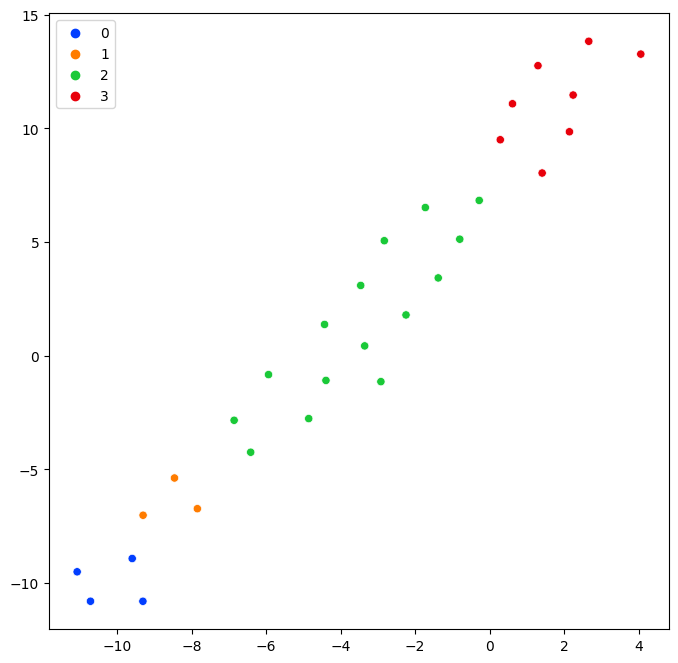

In [1425]:
tsne = TSNE(perplexity=10)
plt.figure(figsize=(8,8))
teste = tsne.fit_transform(df.drop(columns='cluster'))
sns.scatterplot(x=teste[:, 0], y=teste[:, 1], hue=labels, palette='bright')